In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Ignore depreciation and user warnings for this notebook
import warnings
warnings.filterwarnings("ignore") 

In [3]:
%run ../tools/echelle.py
cb = Calibrations('../resources/calibration_files')

cb.filenames['orders'] = 'pattern_cmos.txt'
# cb.filenames['sphr'] = 'absolute_cmos.sif'
cb.filenames['sphr'] = 'sphere_CMOS.sif'
cb.filenames['bkgr'] = 'sphere_CMOS_bkg.sif'
cb.filenames['wavelength'] = 'Th_wavelength_CMOS.txt'

In [4]:
cb.start()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (29,) + inhomogeneous part.

In [6]:
%run ../tools/echelle.py

em = EchelleImage('../resources/calibration_files/ThAr_10.0s_16bit.sif',
                  clbr=cb)

In [7]:
# Calculate order spectra
em.calculate_order_spectra()
print("Initial order spectra shape:", em.order_spectra.shape)
os_init = em.order_spectra.copy()

# Apply corrections
em.correct_order_shapes()
print("Corrected order spectra shape:", em.order_spectra.shape)
os_corr = em.order_spectra.copy()

Initial order spectra shape: (1, 29)
Corrected order spectra shape: (1, 29, 2560)


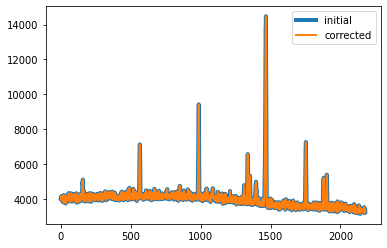

In [8]:
# Visualise initial vs corrected order spectra
frame = 0  # select a single frame from image
order = 28  # select single order from frame
plt.plot(os_init[frame, order], lw=4, label='initial')
plt.plot(os_corr[frame, order], lw=2, ls='-', label='corrected')
plt.legend()

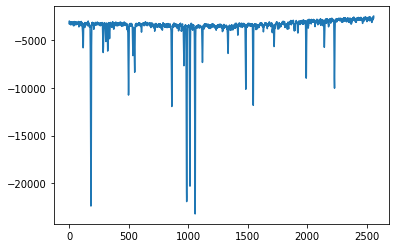

In [9]:
df = 1
f0 = 1 + df * 2
order = 6
plt.plot((em.order_spectra[f0:f0+df, order, :].sum(axis=0) 
          - em.order_spectra[0,order,:] * df) / df, '-')

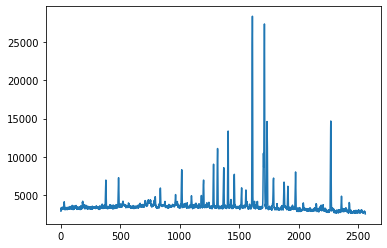

In [10]:
frame = 0
order = 8
plt.plot(em.order_spectra[frame, order, :])

In [11]:
em.calculate_spectra()
# em.plot_order_image(28,6,20)

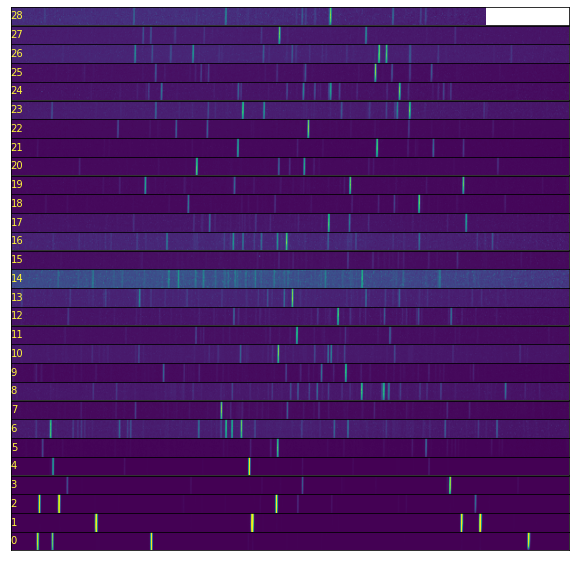

In [12]:
frame = 0
em.plot_cut_image(frame, 5)
plt.gcf().set_size_inches(10, 10)
# savefig('CMOS_cut.png', dvi=300, pad_inches=0, bbox_inches='tight')

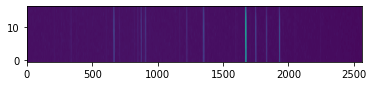

In [13]:
em.plot_order_image(0, 25, 25)

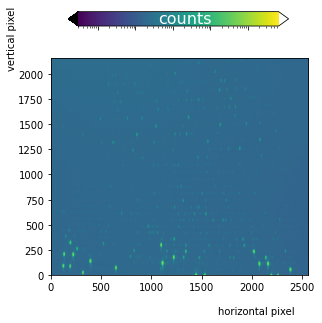

In [14]:
em.plot_frame(0, scale=10)

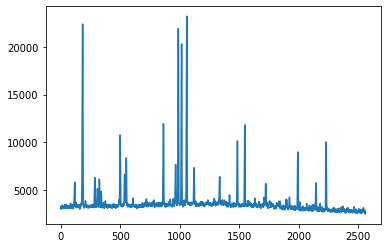

In [15]:
plt.plot(em.order_spectra[0, 6, :])

In [16]:
s = Spectrum(em)

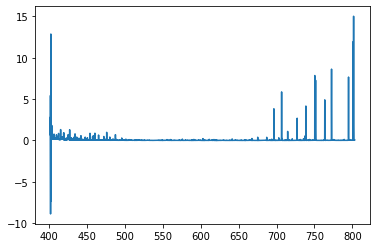

In [17]:
frame = 0
x = s.wavelength
y = s.spectra_to_save['wm'][frame]
plt.plot(x, y)